In [2]:
import pandas as pd
crime = pd.read_csv("us_statewide_crime.csv")
crime.head()

,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan
0,Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2
1,Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6
2,Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9
3,Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0
4,California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7


In [3]:
import geopandas
state = geopandas.read_file("ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")
state.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."


In [4]:
full = pd.merge(state, crime, left_on='name', right_on='State', how='outer')
full.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",Minnesota,281,3.1,7.9,90.8,31.2,19.6,3.3,70.3
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,"POLYGON ((-116.04823 49.00037, -113.05950 49.0...",Montana,241,1.8,16.0,89.6,23.8,21.4,4.9,33.4
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",North Dakota,81,0.6,12.8,85.5,22.6,19.1,3.0,43.4
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",Hawaii,244,2.9,10.6,87.4,26.3,19.1,4.3,72.9
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,"POLYGON ((-116.04823 49.00037, -115.96780 47.9...",Idaho,253,1.2,13.3,86.2,20.0,17.7,4.9,38.6


<AxesSubplot:>

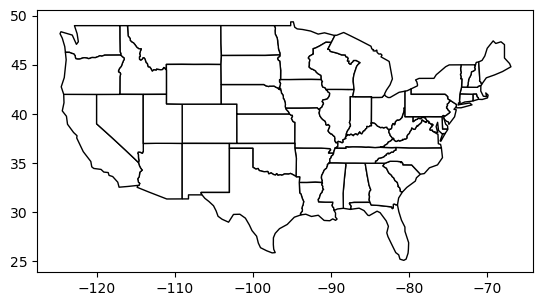

In [6]:
full_lower = full.drop([3, 50])
full_lower.plot(color='white', edgecolor='black')

In [38]:
import folium
m = full_lower.explore(
    column="Unemployed", 
    legend=True,  # show legend
    tooltip='State',  # hide tooltip
    popup=["Violent_Crime", 'Murder_Rate','Poverty','High_School', 'College', 
          'Single_Parent', 'Metropolitan'],  # show popup (on-click)
    name="crime",  # name of the layer in the map
)

#folium.TileLayer("CartoDB positron", show=False).add_to(m)  
folium.LayerControl().add_to(m) 

title_html = '''
             <h3 align="center" style="font-size:16px"><b>The choropleth map of US unemployment rate</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))


m  # show map

In [39]:
m.save("map.html")

In [54]:
import altair as alt

selection = alt.selection_interval(encodings=['x'])

chart = alt.Chart(crime).mark_circle().encode(
    y='Poverty:Q',
    x='Unemployed:Q',
    color=alt.condition(selection, alt.value('blue'), alt.value('lightgray')),
    tooltip = 'Unemployed'
).add_params(
    selection
).properties(
    width = 200,
    height = 200
)

#chart
#chart.encode(x='Acceleration:Q')
collect = (chart | chart.encode(y='Violent_Crime:Q') | chart.encode(y='Murder_Rate:Q')
          ) & (chart.encode(y='Single_Parent:Q') | chart.encode(y='High_School:Q') | chart.encode(y='College:Q'))

collect = collect.properties(
    title = "Interactive scatter plot to show the relationship between unemployment rate and other metrics"
)

In [55]:
collect.save('scatter.html')

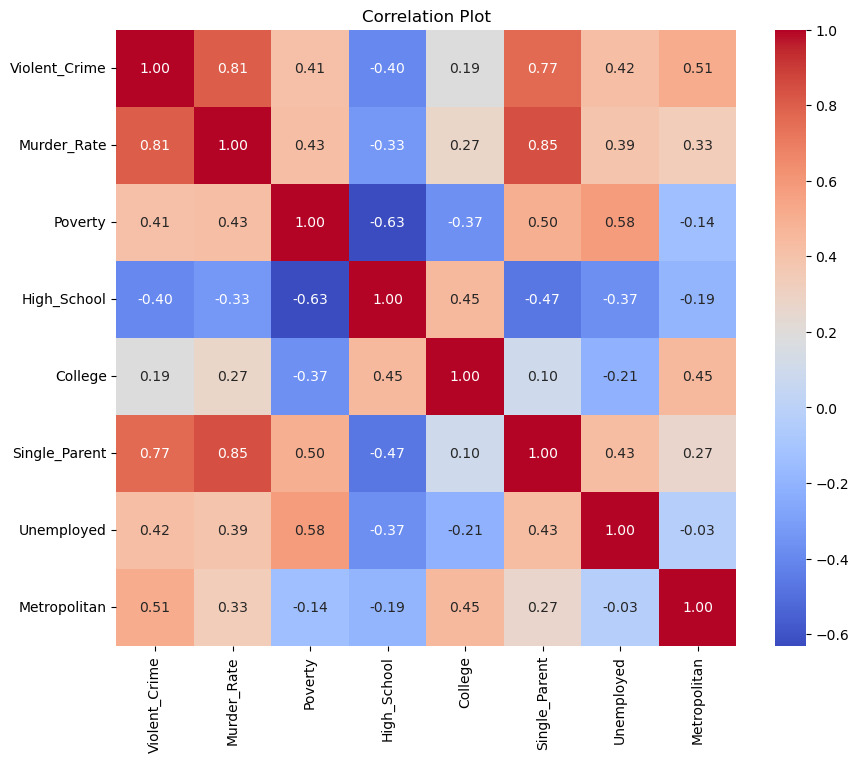

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = crime.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.savefig('correlation_plot.png', bbox_inches='tight')  # Save the plot with title
plt.show()

In [122]:
options = crime[crime['State'] != 'Massachusetts']['State'].tolist()

input_dropdown = alt.binding_select(
    options=options, 
    name = "State"
)

selection = alt.selection_point(
    fields=['State'],
    bind=input_dropdown,
    value = "Alabama"
)

chart1 = alt.Chart(crime).mark_bar().encode(
    x='State:N',
    y='Unemployed:Q'
).add_params(
    selection
).transform_filter(
    selection | alt.FieldEqualPredicate(field='State', equal='Massachusetts') 
).properties(
    width = 50,
    height = 150
)

summary = chart1 | chart1.encode(y='Violent_Crime:Q') | chart1.encode(y='Murder_Rate:Q') | chart1.encode(y='Poverty:Q') | chart1.encode(y='High_School:Q') | chart1.encode(y='College:Q') | chart1.encode(y='Single_Parent:Q') | chart1.encode(y='Metropolitan:Q')


In [123]:
summary.save('summary.html')